In [124]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [74]:
# define rotation matrices
def rotX(epsilon):
    xmatrix = xmatrix = [[1,0,0],[0, np.cos((np.radians(epsilon))), -1*np.sin((np.radians(epsilon)))], [0, np.sin((np.radians(epsilon))), np.cos((np.radians(epsilon)))]]
    return xmatrix
def rotY(phi):
    ymatrix = [[np.cos((np.radians(phi))), 0, np.sin((np.radians(phi)))], [0,1,0], [-1*np.sin((np.radians(phi))), 0, np.cos((np.radians(phi)))]]
    return ymatrix
def getTDM2(delta):
    #underscore for local variables (inside the function = local)
    _d = np.radians(delta)
    TDM1 = [-1*np.cos(_d), -1*np.sin(_d), 0]
    TDM2 = [np.cos(_d), 0, -1*np.sin(_d)]
    return [TDM1, TDM2]
def getTDM3(delta):
    #underscore for local variables (inside the function = local)
    _d = np.radians(delta)
    TDM1 = [-1*np.sin(_d), -1*np.cos(_d), 0]
    TDM2 = [np.cos(_d), 0, -1*np.sin(_d)]
    TDM3 = [0, np.sin(_d), np.cos(_d)]
    return [TDM1, TDM2, TDM3]

In [90]:
def getTheta(v):
    size = len(v)
    theta = 0
    for _v in v:
        _theta = ((_v[2])**2)/(((_v[0])**2)+((_v[1])**2)+((_v[2])**2))
        theta = theta + _theta
    theta = theta/size
    return theta

In [184]:
# populate a matrix of zeros and then we'll store our results in that matrix as we get them
# otherwise we'd have to .append() every single number
# this way we can just index into the matrix and replace results = np.zeros((len(delta), len(epsilon), len(phi)))
def calcThetas(delta, numLigands):
    epsilon = [i for i in range(0, 361)] # can also populate by writing this as i/2 for example 
    phi = [i for i in range(0,361)]
    results = np.zeros(( len(epsilon), len(phi)))
    d = delta
    for idx_e, e in enumerate(epsilon):
        for idx_p, p in enumerate(phi):
            rot_X = rotX(e)
            rot_Y = rotY(p)
            rot = np.matmul(rot_X, rot_Y)
            if numLigands == 3: #this lets us to heteroleptic and homoleptics in the same loop
                TDMs = getTDM3(d)
            elif numLigands == 2:
                TDMs = getTDM2(d)
            else:
                print ('ligands must be 2 or 3')
                pass
            res_tdms = []
            for tdm in TDMs:
                res_tdms.append(np.matmul(tdm, rot))
                    #print(tdm)
                #temp = getTheta(res_tdms)
                #print("hello world")
                #print(temp)
            results[idx_e][idx_p] = getTheta(res_tdms) 
    return results, epsilon, phi

In [187]:
# INPUT DELTA HERE, CHANGE THE 3 TO A 2 IF WANT 'ACAC MODEL'
delta = float(input('delta value in degrees?'))
temp, epsilon, phi = calcThetas(delta,3)
np.shape(temp)

delta value in degrees?40


(361, 361)

(361,)
(361,)
(361, 361)


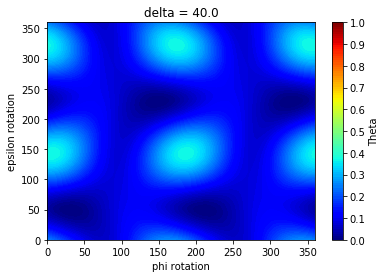

In [188]:
print((np.shape(epsilon)))
print(np.shape(phi))
print(np.shape(temp))

fig = plt.figure()

# making the lines thinner
v1 = np.linspace(0,1, 100, endpoint = True) # 100 steps between theta 0 and theta 1 
v2 = np.linspace(0,1, 11, endpoint = True) # makes the color bar 1-10 by 1's
ax = fig.add_subplot(111)
plot = ax.contourf(phi, epsilon, temp, v1, cmap = plt.cm.jet)
cbar = fig.colorbar(plot, ticks = v2) #adds the scale bar
cbar.set_label('Theta')
plt.xlabel('phi rotation')
plt.ylabel('epsilon rotation')
plt.title('delta = '+ str(delta))
plt.show()